In [192]:
# importing libraries
import pandas as pd
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline

## GATHERING DATA
We will get the data from 3 sources: 
1. An existing csv
2. A url
3. Twitter API

In [79]:
# Reading data from the existing csv
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
106,871879754684805121,NaN,NaN,2017-06-06 00:01:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lassie. She's celebrating #PrideM...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871879754...,13,10,Lassie,None,None,None,None
203,853299958564483072,NaN,NaN,2017-04-15 17:32:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rumpole. He'll be your Uber driver thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853299958...,13,10,Rumpole,None,None,None,None


In [64]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   text                2356 non-null   object
 2   rating_numerator    2356 non-null   int64 
 3   rating_denominator  2356 non-null   int64 
 4   name                2356 non-null   object
 5   doggo               2356 non-null   object
 6   floofer             2356 non-null   object
 7   pupper              2356 non-null   object
 8   puppo               2356 non-null   object
dtypes: int64(3), object(6)
memory usage: 165.8+ KB


In [3]:
tweet_ids = archive.tweet_id.values
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

### Getting Data from a URL using requests library

In [74]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
# Writing contents of the URL into the file
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [71]:
# Reading the already saved text file into the dataframe
df_list = []
file = open('image_predictions\image-predictions.tsv')
for line in file:
    line = file.readline()[:-1]
    tweet_id, jpg_url, img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog = line.split('\t')
    df_list.append({'tweet_id': tweet_id,
                    'jpg_url': jpg_url,
                    'img_num': img_num,
                   'p1': p1,
                   'p1_conf': p1_conf,
                   'p1_dog': p1_dog,
                   'p2': p2,
                   'p2_conf': p2_conf,
                   'p2_dog': p2_dog,
                   'p3': p3,
                   'p3_conf': p3_conf,
                   'p3_dog': p3_dog})
predictions = pd.DataFrame(df_list, columns = ['tweet_id', 'jpg_url', 'img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'])
    

In [72]:
predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1033,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.48757399999999995,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
1034,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.34170300000000003,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
1035,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.22576999999999997,True,German_short-haired_pointer,0.175219,True
1036,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.0313789,True
1037,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.09704860000000001,False,bagel,0.08585110000000001,False,banana,0.07611,False


### Getting Data from Twitter API

In [9]:
# Getting access to twitter API using the tweepy Library
#consumer_key = ''
#consumer_secret = ''
#access_token = ''
#access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)


In [49]:
# Writing content of the twiter API to a file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except:
            144 
            pass

In [65]:
# Reading file to DataFrame
data_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        data_list.append(json.loads(line))
        json_df = pd.DataFrame(data_list)

In [67]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2143 non-null   object 
 1   id                             2143 non-null   int64  
 2   id_str                         2143 non-null   object 
 3   full_text                      2143 non-null   object 
 4   truncated                      2143 non-null   bool   
 5   display_text_range             2143 non-null   object 
 6   entities                       2143 non-null   object 
 7   extended_entities              1893 non-null   object 
 8   source                         2143 non-null   object 
 9   in_reply_to_status_id          70 non-null     float64
 10  in_reply_to_status_id_str      70 non-null     object 
 11  in_reply_to_user_id            70 non-null     float64
 12  in_reply_to_user_id_str        70 non-null     o

## ASSESSING DATA
Here, i visually and progammatically assessed the data for quality and tidyness issues, using the Define, Code and Test method.

In [82]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2143 non-null   object 
 1   id                             2143 non-null   int64  
 2   id_str                         2143 non-null   object 
 3   full_text                      2143 non-null   object 
 4   truncated                      2143 non-null   bool   
 5   display_text_range             2143 non-null   object 
 6   entities                       2143 non-null   object 
 7   extended_entities              1893 non-null   object 
 8   source                         2143 non-null   object 
 9   in_reply_to_status_id          70 non-null     float64
 10  in_reply_to_status_id_str      70 non-null     object 
 11  in_reply_to_user_id            70 non-null     float64
 12  in_reply_to_user_id_str        70 non-null     o

In [109]:
json_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [111]:
json_df.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.143000e+03,7.000000e+01,7.000000e+01,2143.000000,2143.000000,2.600000e+01
mean,7.466532e+17,7.500565e+17,2.244362e+16,2571.601960,7356.772748,8.113972e+17
std,6.893755e+16,7.639099e+16,1.321450e+17,4304.308647,11315.229426,6.295843e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,1.000000,0.000000,6.721083e+17
25%,6.765895e+17,6.753863e+17,2.187286e+08,491.000000,1085.000000,7.761338e+17
50%,7.359920e+17,7.311115e+17,4.196984e+09,1242.000000,3227.000000,8.281173e+17
75%,8.037328e+17,8.305769e+17,4.196984e+09,3011.000000,9322.500000,8.637581e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,70886.000000,145083.000000,8.860534e+17


In [81]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [78]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  1038 non-null   object
 1   jpg_url   1038 non-null   object
 2   img_num   1038 non-null   object
 3   p1        1038 non-null   object
 4   p1_conf   1038 non-null   object
 5   p1_dog    1038 non-null   object
 6   p2        1038 non-null   object
 7   p2_conf   1038 non-null   object
 8   p2_dog    1038 non-null   object
 9   p3        1038 non-null   object
 10  p3_conf   1038 non-null   object
 11  p3_dog    1038 non-null   object
dtypes: object(12)
memory usage: 97.4+ KB


In [240]:
predictions.p3_dog.value_counts()

True     744
False    294
Name: p3_dog, dtype: int64

In [98]:
predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
133,670804601705242624,https://pbs.twimg.com/media/CU8tOJZWUAAlNoF.jpg,1,Pomeranian,0.86856,True,Pekinese,0.09012919999999999,True,chow,0.021722099999999998,True
2,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
86,669000397445533696,https://pbs.twimg.com/media/CUjETvDVAAI8LIy.jpg,1,Pembroke,0.82294,True,Cardigan,0.177035,True,basenji,2.33526e-05,True
748,783391753726550016,https://pbs.twimg.com/media/Ct8qn8EWIAAk9zP.jpg,4,Norwegian_elkhound,0.87713,True,cairn,0.0862406,True,keeshond,0.0110191,True
197,673612854080196609,https://pbs.twimg.com/media/CVknUTlVEAARjU5.jpg,1,Newfoundland,0.22310100000000002,True,Leonberg,0.111106,True,shovel,0.0856263,False
1022,886258384151887873,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,pug,0.943575,True,shower_cap,0.0252856,False,Siamese_cat,0.00284892,False
939,846153765933735936,https://pbs.twimg.com/media/C74kWqoU8AEaf3v.jpg,1,giant_schnauzer,0.346468,True,flat-coated_retriever,0.21845100000000003,True,Labrador_retriever,0.10802,True
785,794926597468000259,https://pbs.twimg.com/media/CwglhZVXgAAc3_w.jpg,1,teddy,0.569566,False,bath_towel,0.173745,False,toy_poodle,0.0376618,True
948,850145622816686080,https://pbs.twimg.com/media/C8xS655XkAAv9vo.jpg,2,tennis_ball,0.7147979999999999,False,kelpie,0.10539000000000001,True,malinois,0.05855269999999999,True
625,747885874273214464,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,1,kuvasz,0.40845,True,Samoyed,0.14132999999999998,True,pug,0.08301839999999999,True


In [102]:
predictions.describe()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038
unique,1038,1024,4,277,1023,2,290,1023,2,302,1024,2
top,782722598790725632,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,golden_retriever,0.873233,True,golden_retriever,0.13061099999999998,True,Labrador_retriever,0.0464032,True
freq,1,2,873,80,2,771,54,2,773,47,2,744


In [108]:
archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [105]:
archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
560,802952499103731712,NaN,NaN,2016-11-27 19:09:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marley. She's having a ruff day. Prett...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/802952499...,12,10,Marley,None,None,None,None
238,847116187444137987,NaN,NaN,2017-03-29 16:00:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable... We. Only. Rate. Dogs. Please s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847116187...,11,10,None,None,None,None,None
2009,672254177670729728,NaN,NaN,2015-12-03 03:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,None,None,pupper,None
2225,668286279830867968,NaN,NaN,2015-11-22 04:33:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rusty. Rusty's dreaming of a world where ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668286279...,11,10,Rusty,None,None,None,None
100,872820683541237760,NaN,NaN,2017-06-08 14:20:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here are my favorite #dogsatpollingstations \n...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872820683...,13,10,None,None,None,None,None
106,871879754684805121,NaN,NaN,2017-06-06 00:01:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lassie. She's celebrating #PrideM...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871879754...,13,10,Lassie,None,None,None,None
481,815639385530101762,NaN,NaN,2017-01-01 19:22:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Titan. His nose is quite chilly. Reque...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815639385...,12,10,Titan,None,None,None,None
117,870063196459192321,NaN,NaN,2017-05-31 23:43:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clifford. He's quite large. Also red. Goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870063196...,14,10,Clifford,None,None,None,None
999,748220828303695873,NaN,NaN,2016-06-29 18:25:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Stop what you're doing and watch this heckin m...,NaN,NaN,NaN,https://vine.co/v/iiLjKuYJpr6,13,10,None,None,None,None,None
558,803321560782307329,NaN,NaN,2016-11-28 19:35:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Philbert. His toilet br...,7.677549e+17,4.196984e+09,2016-08-22 16:06:54 +0000,https://twitter.com/dog_rates/status/767754930...,11,10,Philbert,None,None,None,None


In [99]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [103]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


## Define
### Quality issues
1. Invalid datatype for predictions df: tweet_id-int, img_num-int, p1_dog;p2_dog;p3_dog-bool, p1_conf;p2_conf,p3_conf-float. 
2. NAN values- archives 
3. nan values json_df
4. invalid p3_conf value in index86, predictions df
5. rating denominator has invalid values, archive df
6. rating numerator has invalid values, archive df
7. Get more descriptive column names to id('tweet_id') in json_df
8. Get more descriptive column names to p1,p1_dog, p2_conf, p2, p2_dog, p2_conf,p3, p3_dog, p3_conf, img_num, jpg_url  in predictions
9. remove retweet-related columns 
10. Replace None in stage columns with empty string
11. Remove html tags from source column to make it more readable.

### Tidyness Issues 
1. Delete columns from archives and json
2. Combine all dog stages into one column 
3. Merge tables together
4. Delete doggo, floofer, pupper and poppo columns

In [501]:
## getting a copy of the dataframes
json_df_clean = json_df.copy()
predictions_clean = predictions.copy()
archive_clean = archive.copy()

## Code and Test

In [502]:
# remove retweet-related columns 
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]

In [503]:
# change datatype for archive
archive_clean = archive_clean.astype({'source':'object'})

In [504]:
#Testing
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [505]:
# Remove html tags from source column to make it more readable.
archive_clean.source = archive_clean.source.str.split('"', expand = True)[1]

In [506]:
#testing
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [507]:
# Deleting unecessary columns
archive_clean = archive_clean.drop(columns = ['in_reply_to_status_id','source', 'in_reply_to_user_id', 'timestamp', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls'])

In [508]:
# Deleting unecessary columns
json_df_clean = json_df_clean[['id', 'retweet_count', 'favorite_count']]
# Renaming columns
json_df_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

In [509]:
#Test
json_df_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7024,33860
1,892177421306343426,5304,29360
2,891815181378084864,3488,22084
3,891689557279858688,7236,36985
4,891327558926688256,7775,35360
...,...,...,...
2138,666049248165822465,37,89
2139,666044226329800704,115,247
2140,666033412701032449,36,100
2141,666029285002620928,39,112


In [510]:
#Test
archive_clean

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None
2353,666033412701032449,Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None
2354,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7,10,a,None,None,None,None


In [511]:
#Test
predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
1,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True
2,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
3,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.9330120000000001,False,mud_turtle,0.04588540000000001,False,terrapin,0.017885299999999996,False
4,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014593799999999999,False,golden_retriever,0.00795896,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1033,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.48757399999999995,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
1034,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.34170300000000003,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
1035,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.22576999999999997,True,German_short-haired_pointer,0.175219,True
1036,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.0313789,True


In [512]:
## COMBINING DOG STAGES

# First replace None in stage columns with empty string as follows.
archive_clean.doggo.replace('None', '', inplace=True) 
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

# Then combine stage columns.
archive_clean['stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.
archive_clean.loc[archive_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
archive_clean.loc[archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
archive_clean.loc[archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

# Delete doggo, floofer, pupper and poppo columns

archive_clean = archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

In [513]:
#Merge 2 DF together
combined_df = pd.merge(json_df_clean,archive_clean, on = 'tweet_id')

In [514]:
# changing datatype for predictions
predictions_clean = predictions_clean.astype({'tweet_id':'int64', 'img_num':'int64','p1_conf':'float32', 'p2_conf':'float32', 'p3_conf':'float32'})


In [515]:
#Test
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1038 non-null   int64  
 1   jpg_url   1038 non-null   object 
 2   img_num   1038 non-null   int64  
 3   p1        1038 non-null   object 
 4   p1_conf   1038 non-null   float32
 5   p1_dog    1038 non-null   object 
 6   p2        1038 non-null   object 
 7   p2_conf   1038 non-null   float32
 8   p2_dog    1038 non-null   object 
 9   p3        1038 non-null   object 
 10  p3_conf   1038 non-null   float32
 11  p3_dog    1038 non-null   object 
dtypes: float32(3), int64(2), object(7)
memory usage: 85.3+ KB


In [516]:
# correcting p3 conf values
predictions_clean[predictions_clean.p3_conf >=1] = predictions_clean.p3_conf * 100

In [517]:
# renaming columns for better description
predictions_clean = predictions_clean.rename(columns = {'p1': 'prediction_1','p1_dog': 'prediction_1_dog', 'p1_conf': 'prediction_1_confidence','p2': 'prediction_2','p2_dog': 'prediction_2_dog', 'p2_conf': 'prediction_2_confidence','p3': 'prediction_3','p3_dog': 'prediction_3_dog', 'p3_conf': 'prediction_3_confidence', 'img_num':'image_number', 'jpg_url': 'image_url'}) 
 

In [518]:
# Test
predictions_clean

,tweet_id,image_url,image_number,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
3,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
4,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1033,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
1034,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
1035,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
1036,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [519]:
# Test
combined_df

,tweet_id,retweet_count,favorite_count,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,7024,33860,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343426,5304,29360,This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,891815181378084864,3488,22084,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,891689557279858688,7236,36985,This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,891327558926688256,7775,35360,This is Franklin. He would like you to stop ca...,12,10,Franklin,
...,...,...,...,...,...,...,...,...
1978,666049248165822465,37,89,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,
1979,666044226329800704,115,247,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,
1980,666033412701032449,36,100,Here is a very happy pup. Big fan of well-main...,9,10,a,
1981,666029285002620928,39,112,This is a western brown Mitsubishi terrier. Up...,7,10,a,


In [520]:
#Merge dataframes
combined_df = pd.merge(combined_df, predictions_clean, on = 'tweet_id')

In [521]:
#Drop unecessary columns
combined_df.drop(['image_url', 'image_number'],axis = 1, inplace = True)

In [522]:
combined_df

,tweet_id,retweet_count,favorite_count,text,rating_numerator,rating_denominator,name,stage,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog
0,892420643555336193,7024,33860,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,891815181378084864,3488,22084,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891327558926688256,7775,35360,This is Franklin. He would like you to stop ca...,12,10,Franklin,,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
3,890971913173991426,1672,10381,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
4,890609185150312448,3628,24553,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,666057090499244032,112,249,My oh my. This is a rare blond Canadian terrie...,9,10,a,,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
913,666051853826850816,707,1030,This is an odd dog. Hard on the outside but lo...,2,10,an,,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
914,666049248165822465,37,89,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
915,666033412701032449,36,100,Here is a very happy pup. Big fan of well-main...,9,10,a,,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [523]:
# saving CSV
combined_df.to_csv('twitter_archive_master.csv', index = False)

## ANALYSIS & VISUALIZATION

In [524]:
# Most popular numerator rating
combined_df.rating_numerator.value_counts()

12      219
10      188
11      178
13      119
9        64
8        50
7        25
14       21
5        13
6        11
3         7
4         6
2         4
1         3
0         2
24        1
84        1
99        1
144       1
165       1
204       1
1776      1
Name: rating_numerator, dtype: int64

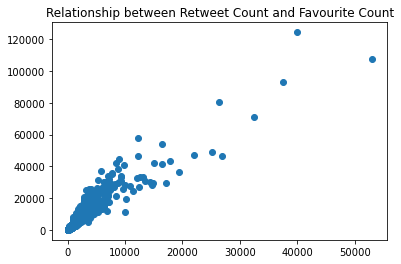

In [525]:
#relationship between favorite count and retweet count
plt.scatter(combined_df.retweet_count,combined_df.favorite_count);
plt.title('Relationship between Retweet Count and Favourite Count');

In [526]:
# Checking for the accuracy of the predictions
a = combined_df['prediction_1_dog'].value_counts()
b = combined_df['prediction_2_dog'].value_counts()
c = combined_df['prediction_3_dog'].value_counts()

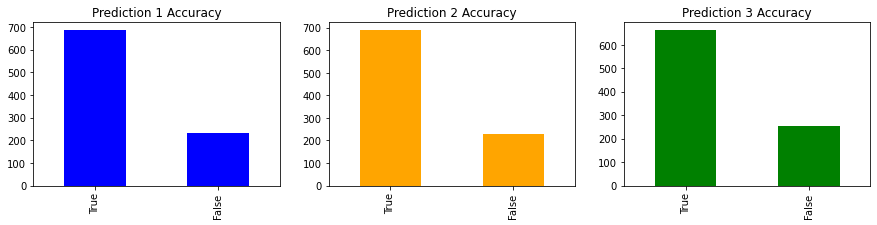

In [527]:
#plotting the bar charts
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(15,3))

#Items needed in the loop function
list = [a,b,c]
colors = ['blue', 'orange', 'green']
titles = ['Prediction 1 Accuracy', 'Prediction 2 Accuracy', 'Prediction 3 Accuracy']
axes = [ax1, ax2, ax3]


for m,n in enumerate(list):
    n.plot.bar(color = colors[m], ax = axes[m], title = titles[m])

plt.show();